## MNIST

softmax (확률값 추출) -> cross entropy   
```
"MNIST 데이터는 케라스를 이용해 불러옴"
```

In [67]:
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
# from tensorflow.keras.utils import utils

import numpy as np
import sys
import tensorflow as tf

# seed값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# MNIST데이터셋 불러오기
(X_train,Y_class_train),(X_test,Y_class_test) = mnist.load_data()

print("학습셋 이미지수: %d개" % (X_train.shape[0]))
print("테스트셋 이미지수: %d개" % (X_test.shape[0]))

학습셋 이미지수: 60000개
테스트셋 이미지수: 10000개


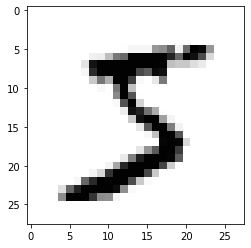

In [68]:
# 불러온 70000개 이미지 중 한개만 다시 불러오면
# 그래프로 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="Greys")
plt.show()

In [69]:
# 픽셀로 데이터 확인. 이 이미지는 28*28 = 784개의 픽셀로 이루어짐
# 픽셀로 확인
# 각 픽셀은 밝기 정도에 따라 0부터 255까지의 등급을 매김
# 흰색 배경이 0이라면 글씨가 들어간 곳은 1~255까지 숫자중 하나로 채워져 긴 행렬로 이루어진 집합 
# 784개의 속성을 이용해서 10개의 클래스를 맞추는 문제가 됨
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [70]:
# 가로 28, 세로 28의 2차원 배열을 784개의 1차원 배열로 차원축소 하면, 784개의 속성으로 이용가능
# reshape(총 샘플수, 1차원 속성의 수)형식으로 지정함
# 28*28 2차원 데이터 784개를 1차원 데이터로 바꿔주면 784개의 속성으로 이용 가능하다.
# 차원 변환 과정(2차원->1차원)
X_train = X_train.reshape(X_train.shape[0], 784)
# 정규화: 데이터의 폭이 클 때 적절한 값으로 분산의 정도를 바꾸는 과정 
# 현재 주어진 데이터의 값은 0부터 255까지의 정수로 정규화를 위해 255로 나누어 주려면 먼저 이 값을 
# 실수 형태로 바꿔야 함 -> astype('float64')

# 28*28 2차원 데이터 784개의 1차원 데이터로 바꿔주면 784개의 속성으로 이용가능하다.
X_train = X_train.reshape(X_train.shape[0], 784)

# 케라스는 데이터가 0~1사이 값일 때 최적의 성능으로 예측함
# 데이터 정규화(Normalization): 255로 나눠준다
X_train = X_train.astype('float64')
X_train = X_train / 255

# 테스트셋에도 정규화 작업
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [71]:
# 실제로 이 숫자의 레이블이 어떤지를 불러오고자 Y_class_rain[0]을 다음과 같이 출력해보자 -> 5

In [72]:
# 아이리스 품종을 예측할 때 딥러닝의 분류문제를 해결하려면 원-핫 인코딩 방식을 적용해야 함.
# 즉, 0부터 9까지의 정수형 값을 갖는 현재 형태에서 0또는 1로만 이루어진 벡터로 갑승ㄹ 수정해야 함
# -> 바이너리화 과정
# 지금까지 우리가 열어본 이미지의 class는 5였음. -> 이를 [0,0,0,0,0,1,0,0,0,0]으로 바꿔줘야 함
# : to_categorical(클래스,클래스의 개수)함수 이용

# 클래스 값 확인
print("class: %d" % (Y_class_train[0]))

# 현재 클래스를 0~9정수값에서 0 or 1인 벡터로 수정해야 함
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_train = np_utils.to_categorical(Y_class_test, 10)

print(Y_train[0])

class: 5
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [73]:
# from keras.datasets import mnist
# from keras.utils import np_utils
# from keras.models import Sequential
# from keras.layers import Dense 
# from keras.callbacks import ModelCheckpoint,EarlyStopping

# import matplotlib.pyplot as plt
# import numpy
# import os
# import tensorflow as tf

# # seed값 설정
# seed = 0
# numpy.random.seed(seed)
# tf.random.set_seed(3)

# # MNIST데이터 불러오기
# (X_train,Y_train), (X_test, Y_test) = mnist.load_data()

# # 데이터 차 축소,정규화
# X_train = X_train.reshape(X_train.shape[0],784).astype('float32') / 255
# X_test = X_test.reshape(X_train.shape[0],784).astype('float32') / 255

# Y_train = np.utils.to_categorical(Y_train, 10)
# Y_test = np.utils.to_categorical(Y_test, 10)

In [74]:
# 모델 프레임 설정
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os

model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

# 모델 실행 환경 설정
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

# 모델 저장, 최적화 단계에서 학습 자동 중단 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                              verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss',patience=10)

#### """ 딥러닝 실행의 ERROR이유 -> validation _split의 값을 안쓰고 그냥 valiadation_data = \ 이라고 기입 """

In [75]:
# 딥러닝 실행
history = model.fit(X_train, Y_train, validation_split = 0.2,
                  epochs=30, batch_size = 200, verbose=0,
                  callbacks=[early_stopping_callback, checkpointer])

ValueError: Data cardinality is ambiguous:
  x sizes: 48000
  y sizes: 10000
Make sure all arrays contain the same number of samples.

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

313/313 [==============================] - 1s 2ms/step - loss: 2.3810 - accuracy: 0.0679

 Test Accuracy: 0.0679


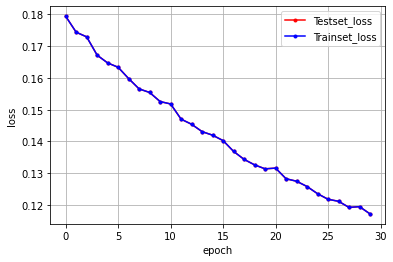

In [76]:
### 모델 실행과정을 그래프로 확인하기
# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test,Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습 셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len,y_vloss, marker = '.', c="red", label = 'Testset_loss')
plt.plot(x_len,y_vloss, marker = '.', c="blue", label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = 'upper right')
# plt.axis([0,20,0,0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### DNN(Deep Neural Network) image를 convolution(합성곱)을 해줌
### image의 특징을 잘 뽑아서 그 특징만 나타내는 것을 뽑는 기술


## 합성곱 

<img src = "2022-08-12-10-49-50.png" width="900" height="900">

그림체에서 배경을 흐릿하게 만들고 특징만 뚜렷하게 추출할 수 있음. 데이터의 압축의 개념이 아니라 훨씬 복잡해 질 수 있음. 
*******
합성곱을 하면 하나의 image가 여러개로 바뀔 수 있음. 
DNN의 전처리 과정을 거친 것
****** 
이미지 학습에서 주로 사용하는 것이 CNN이긴 하지만 어떤 전처리 과정을 거치느냐에 따라 RNN, LSTM모형에도 사용가능함. 
*****
""" Conversion, Pooling, Padding """
*****
합성곱은 시간이 느림. 구글 collaboratory의 GPU로 변경시켜서 해보면 빠름 